## Example notebook demonstrating the defect_imager class

Requirements:
- the file 'processed_annotations.csv' to be stored in the path "../data/processed_annotations.csv"
- the images to be stored in "../data/images"


In [1]:
# Load the class
import sys
sys.path.append('../')

from app.imager import image_loader, defect_viewer

### Instantiate an instance

In [2]:
# Instantiate 

image_bank = image_loader()

# View the datasource:
image_bank.annotations_df.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,annotation_shape,bounding_box_coords,parent_label,defect_class
0,Bent Cure 0Pa TestName_20201222_165250.586_C00...,37387,{},7,0,"{""name"":""rect"",""x"":120,""y"":201,""width"":6,""heig...","{""Defect_Class"":""Contact_NearSolderPad""}",rect,"[120, 126, 201, 218]",Contact,NearSolderPad
1,Bent Cure 0Pa TestName_20201222_165250.586_C00...,37387,{},7,1,"{""name"":""rect"",""x"":297,""y"":201,""width"":3,""heig...","{""Defect_Class"":""Contact_NearSolderPad""}",rect,"[297, 300, 201, 226]",Contact,NearSolderPad
2,Bent Cure 0Pa TestName_20201222_165250.586_C00...,37387,{},7,2,"{""name"":""rect"",""x"":325,""y"":200,""width"":4,""heig...","{""Defect_Class"":""Contact_NearSolderPad""}",rect,"[325, 329, 200, 219]",Contact,NearSolderPad
3,Bent Cure 0Pa TestName_20201222_165250.586_C00...,37387,{},7,3,"{""name"":""rect"",""x"":332,""y"":199,""width"":5,""heig...","{""Defect_Class"":""Contact_NearSolderPad""}",rect,"[332, 337, 199, 218]",Contact,NearSolderPad
4,Bent Cure 0Pa TestName_20201222_165250.586_C00...,37387,{},7,4,"{""name"":""rect"",""x"":288,""y"":296,""width"":4,""heig...","{""Defect_Class"":""Contact_FrontGridInterruption""}",rect,"[288, 292, 296, 316]",Contact,FrontGridInterruption


### List all available defect classes

In [3]:
# List available defects:
image_bank.defect_classes

['NearSolderPad',
 'FrontGridInterruption',
 'Closed',
 'Isolated',
 'Resistive',
 'None',
 'HighlyResistive',
 'BrightSpot',
 'Corrosion',
 'Unknown',
 'BeltMarks',
 'Disconnected']

### Show how many of each class exists

In [4]:
# list the defect_classes:
image_bank.instance_count

{'FrontGridInterruption': 40511,
 'NearSolderPad': 20359,
 'Closed': 8464,
 'Resistive': 7968,
 'None': 5236,
 'Isolated': 4453,
 'HighlyResistive': 895,
 'BrightSpot': 675,
 'Disconnected': 361,
 'Corrosion': 145,
 'Unknown': 127,
 'BeltMarks': 16}

### Load n examples of a given class

In [5]:
## Display n examples of a given class from different images at random. 
n_examples = 5
defect_class = 'Closed'

# Load 10 examples of a closed crack
file_dict = image_bank.load_n_examples(n_examples, defect_class)  
file_dict

{'M0633C045000.jpg': [[277, 295, 114, 124],
  'polygon',
  '{"name":"polygon","all_points_x":[277,282,285,293,295,295,290,286,282,277],"all_points_y":[114,121,124,121,119,114,117,118,114,114]}'],
 'M0682C009100.jpg': [[16, 84, 14, 48],
  'polygon',
  '{"name":"polygon","all_points_x":[48,72,84,76,70,16,21,48],"all_points_y":[34,23,14,15,22,47,48,34]}'],
 'M0637C018000.jpg': [[254, 265, 243, 248],
  'polygon',
  '{"name":"polygon","all_points_x":[256,260,265,263,260,254,256],"all_points_y":[248,248,246,243,245,245,248]}'],
 'M0743C018000.jpg': [[54, 74, 51, 71],
  'rect',
  '{"name":"rect","x":54,"y":51,"width":20,"height":20}']}

### Load files in the file_dict as a list of numpy arrays

In [6]:
vector_list = image_bank.load_image_vectors()
print(f"""Obj Type: {type(vector_list)},\nElement type:{type(vector_list[0])}""")

Obj Type: <class 'list'>,
Element type:<class 'numpy.ndarray'>


### Plot some examples


In [7]:
## instantiate the defect_viewer class
image_viewer = defect_viewer(image_bank)

#### View as segmentations

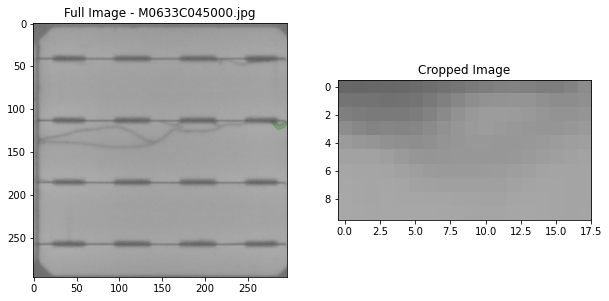

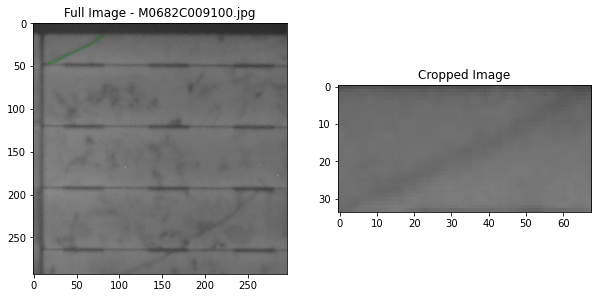

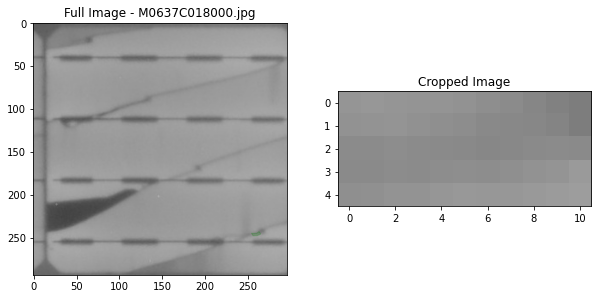

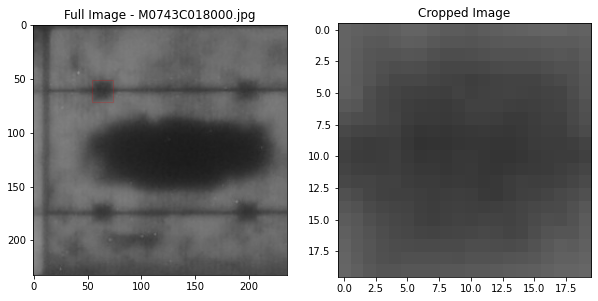

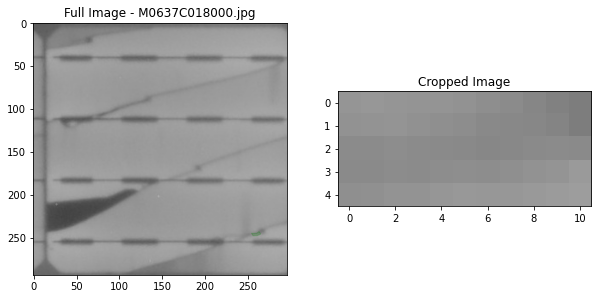

In [8]:
image_viewer.view_loaded_files('segmentations')

#### View bounding boxes around same images

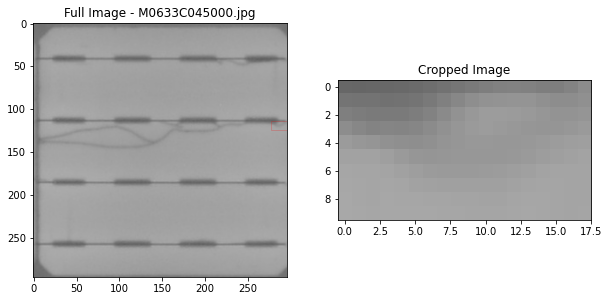

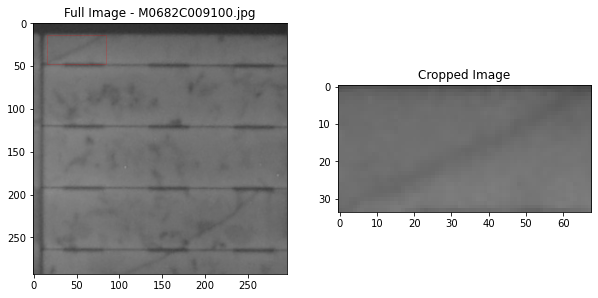

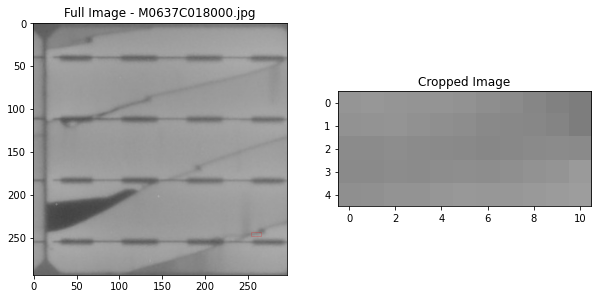

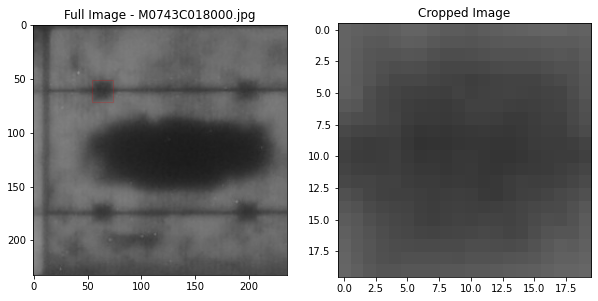

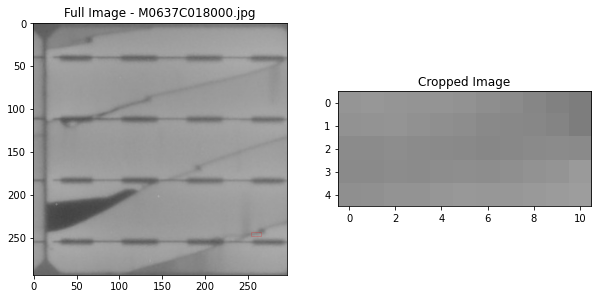

In [9]:
image_viewer.view_loaded_files('bounding_box')